# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Tahsin Ahmad

Datum: 16.11.23

Gruppe: 29

## Forschungsfrage

Was kann ich aus den Koeffizienten  𝐾 schlussfolgern ?
 

## Versuchsaufbau und Durchführung

Sensor_1 befindet sich im roten Becher, Sensor_2 misst die Umgebungstemperatur, das Ganze passiert etwa 10 Minuten lang


<img src="figures/newton.jpg" width="800">

## Versuchsauswertung

In [4]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [5]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_file_path = "data/newton/newton.h5"
# DONE #

In [6]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py
# Opening HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as file:
    # Reading the data from the HDF5 file
    metadata = {
        'created': file.attrs.get('created'),
        'experiment': file.attrs.get('experiment'),
        'group_number': file.attrs.get('group_number'),
        'authors': file.attrs.get('authors'),
    }

    # Printing metadata
    print("Metadata:")
    print(metadata)

    # Reading experimental data from HDF5
    raw_data_group = file['RawData']
    sensors = {}

    for sensor_uuid, sensor_group in raw_data_group.items():
        temperature = list(sensor_group['temperature'])
        timestamp = list(sensor_group['timestamp'])
        sensor_metadata = {
            'name': sensor_group.attrs.get('name'),
            'serial': sensor_group.attrs.get('serial'),
        }

        sensors[sensor_uuid] = {
            'temperature': temperature,
            'timestamp': timestamp,
            'metadata': sensor_metadata,
        }

    # Printing experimental data
    print("\nExperimental Data:")
    print(sensors)

# DONE #

Metadata:
{'created': '2023-11-11', 'experiment': 'Calorimetry', 'group_number': 29, 'authors': 'Tahsin'}

Experimental Data:
{'sensor_1': {'temperature': [86.5625, 86.5625, 86.4375, 86.375, 86.375, 86.1875, 86.1875, 86.0, 85.9375, 85.875, 85.75, 85.75, 85.5625, 85.375, 85.375, 85.1875, 85.0625, 84.9375, 84.8125, 84.6875, 84.625, 84.5625, 84.4375, 84.375, 84.1875, 84.0625, 83.9375, 83.8125, 83.6875, 83.625, 83.4375, 83.3125, 83.25, 83.125, 82.9375, 82.8125, 82.75, 82.625, 82.5625, 82.375, 82.3125, 82.1875, 82.0625, 81.9375, 81.8125, 81.625, 81.5625, 81.375, 81.25, 81.1875, 81.0625, 80.9375, 80.8125, 80.6875, 80.5625, 80.5, 80.375, 80.25, 80.125, 79.9375, 79.875, 79.75, 79.625, 79.5, 79.3125, 79.1875, 79.0, 78.875, 78.75, 78.625, 78.5625, 78.4375, 78.3125, 78.25, 78.125, 78.0, 77.8125, 77.6875, 77.5625, 77.4375, 77.375, 77.1875, 77.125, 77.0, 76.875, 76.75, 76.625, 76.5625, 76.4375, 76.25, 76.125, 76.0, 75.875, 75.75, 75.6875, 75.5625, 75.5, 75.375, 75.25, 75.125, 75.0, 74.9375, 74.8125

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Metadata: {'created': '2023-11-11', 'experiment': 'Calorimetry', 'group_number': 29, 'authors': 'Tahsin'}


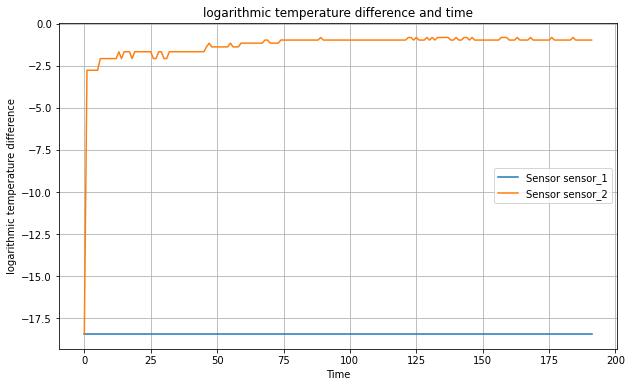

In [7]:
# TODO: Use the temperature and time data for plotting
# Open the HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as file:
    # Reading metadata from the HDF5 file
    metadata = {key: file.attrs.get(key) for key in ['created', 'experiment', 'group_number', 'authors']}
    print("Metadata:", metadata)

    # Reading and plotting experimental data from the HDF5 file
    plt.figure(figsize=(10, 6))
    for sensor_uuid, sensor_group in file['RawData'].items():
        temperature = np.array(sensor_group['temperature'])
        timestamp = np.array(sensor_group['timestamp'])
        temperature_diff = np.log(np.clip(temperature - temperature[0] + 1e-8, 1e-8, None))
        #label
        plt.plot(timestamp, temperature_diff, label=f'Sensor {sensor_uuid}')

    # Labeling and title
    plt.title('logarithmic temperature difference and time')
    plt.xlabel('Time')
    plt.ylabel('logarithmic temperature difference')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
    # DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [8]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
# Opening the HDF5 file in read mode
with h5py.File(hdf5_file_path, 'r') as file:
    # Read data from the 'HDf5
    raw_data_group = file['RawData']
    
    #storing coefficients
    all_K_values_polyfit = []

    for sensor_uuid, sensor_group in raw_data_group.items():
        temperature = np.array(sensor_group['temperature'])
        timestamp = np.array(sensor_group['timestamp'])
        
        # Calculating temperature differences
        temperature_diff = temperature - temperature[0]

        # Using numpy.polyfit as asked
        coeffs = np.polyfit(timestamp, temperature_diff, 1)
        
        # Extracting the K value 
        K_value_polyfit = coeffs[0]

        # Appending the K value for each sensor
        all_K_values_polyfit.append(K_value_polyfit)

    # Calculating the average K value for numpy.polyfit
    avg_K_value_polyfit = np.mean(all_K_values_polyfit)
    # DONE #

#### (iV) Ergebnis

In [9]:
# TODO: Print result
print(f'Average Coefficient K (Polyfit): {avg_K_value_polyfit}')
# DONE #

Average Coefficient K (Polyfit): -0.053160758458684905


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Mein Koeffizient ist negativ, was bedeutet, dass heißes Wasser Wärme verliert oder besser gesagt abgekühlt wird. Je größer dieser Wert ist, desto langsamer ist der Abkühlvorgang, und je kleiner dieser Wert ist, desto schneller kühlt die Flüssigkeit ab. Zusammenfassend ist damit das Newtonsche Abkühlungsgesetz erfolgreich bestätigt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Leider weiß ich nicht, wie groß oder klein der Koeffizient sein sollte, aber solange er negativ ist, bedeutet das, dass das Wasser in meinem Behälter abgekühlt wurde, womit ich eigentlich zufrieden bin.